<a href="https://colab.research.google.com/github/kiyong21c/Must_Have_pytorch_DL/blob/main/20220901_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CNN을 만들어 사물 이미지를 분류하는 모델 만들기
 - 데이터셋 : CIFAR-10(10가지 클래스를 갖음)
 - 동물, 비행기, 트럭, 자동차 등의 이미지

In [2]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

# CIFAR-10 데이터셋 불러오기
training_data = CIFAR10(root='./', train=True, download=True, transform=ToTensor())
test_data = CIFAR10(root='./', train=False, download=True, transform=ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [3]:
training_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
training_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
type(training_data.data) # numpy 배열이네?

numpy.ndarray

In [6]:
training_data.data.shape # (N, H, W, C) : 50000개 이미지, 32X32 크기, RGB

(50000, 32, 32, 3)

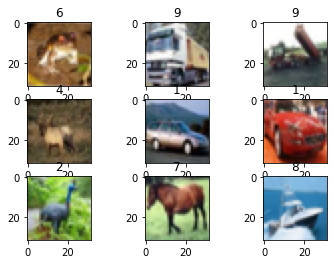

In [7]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(training_data.data[i]);
    plt.title(training_data.targets[i])

### 데이터 증강
 - 데이터가 부족하거나, 오버피팅을 피하는 기법
 - 이미지 크기는 변화시키지 않는다
 - 이미지 일부분을 제거하고 싶다면, 크기를 줄이지 않기위해 제거 영역을 0으로 채운다

In [8]:
import shutil
# shutil.rmtree('/content/cifar-10-python.tar.gz') # 폴더 삭제

import os
os.remove('/content/cifar-10-python.tar.gz') # 파일 삭제

Files already downloaded and verified
Files already downloaded and verified
(50000, 32, 32, 3)


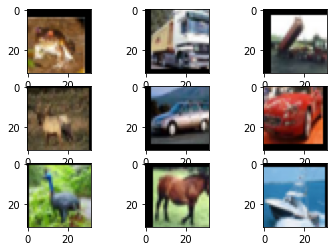

In [9]:
# 데이터 전처리 : 크롭핑과 좌우대칭
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([T.ToPILImage(), # (C x H x W)  →  (H x W x C)
                      RandomCrop((32, 32), padding=4), # (32, 32) : 최종출력크기, padding=4 만큼 임의로 크롭핑
                      RandomHorizontalFlip(p=0.5)])    # 50% 확률로 y축 대칭

training_data = CIFAR10(root='./', train=True, download=True, transform=None)
test_data = CIFAR10(root='./', train=False, download=True, transform=None)

print(training_data.data.shape)

for i in range(9):
    plt.subplot(3, 3, i+1)
    # plt.imshow(training_data.data[i]) # transforms가 적용되어 있지 않다 
    plt.imshow(transforms(training_data.data[i])) # 비로소 transforms가 적용됨

### 이미지 정규화
 - 적(R), 녹(G), 청(B)의 데이터의 분포가 치우쳐져 있으면 학습에 안좋은 영향
 - 정규분포(가우스분포)를 따르도록 정규화

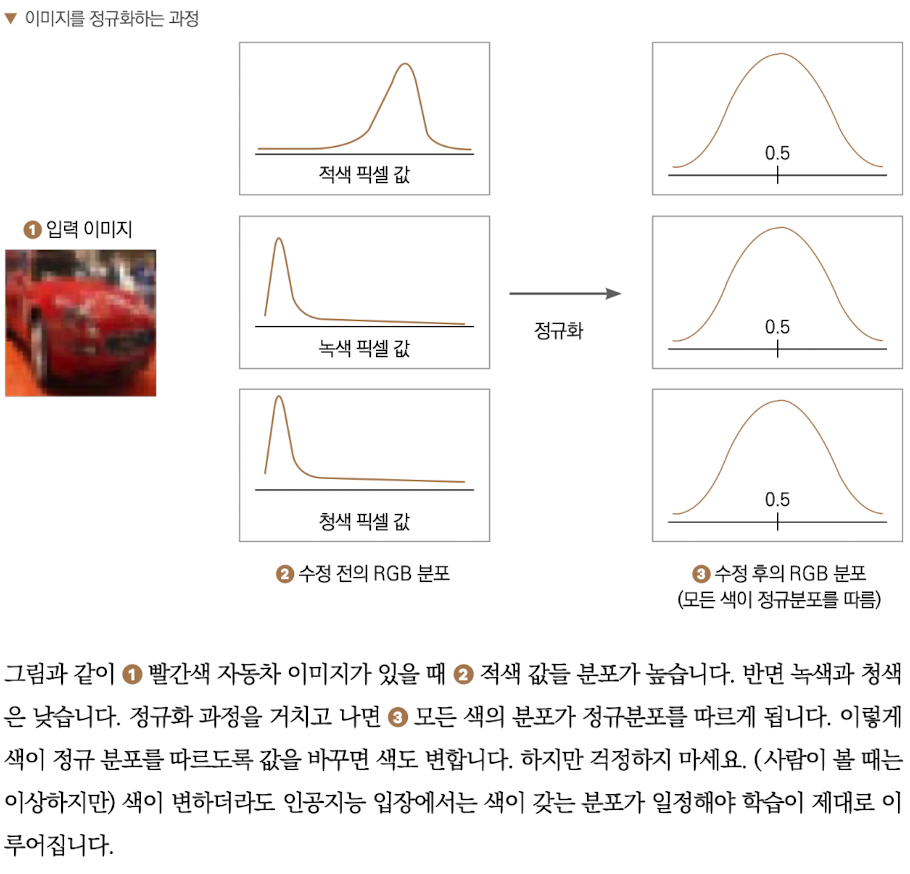

Files already downloaded and verified
Files already downloaded and verified


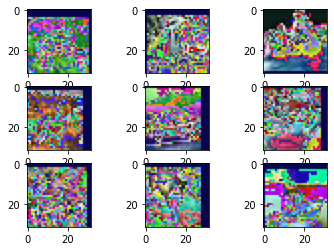

In [57]:
# 데이터 전처리 : 정규화 추가
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

# 데이터 전처리 정의
transforms = Compose([
                      T.ToPILImage(),
                      RandomCrop((32,32), padding=4),
                      RandomHorizontalFlip(p=0.5),
                      T.ToTensor(), # (3, 32, 32) : Cannel, Height, Width
                      Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)), # 텐서타입에서 연산가능
                      T.ToPILImage() # (3, 32, 32) → (32, 32, 3) : Height, Width, Channel
                      ])

training_data = CIFAR10(root='./', train=True, download=True, transform=transforms) # transform을 적용하지 않으면, CIFAR10원본은 PIL.Image 형식
test_data = CIFAR10(root='./', train=False, download=True, transform=transforms)

# 이미지 표시
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(transforms(training_data.data[i])) # training_data.data[i] : numpy.ndarray 형식
    # traininig_data는 transforms적용되어 PIL이미지 형식이 맞으나, traning_data.data는 ndarray이므로 transforms를 다시 적용하여 imshow(PIL이미지형식) 으로 만듬

Files already downloaded and verified
Files already downloaded and verified


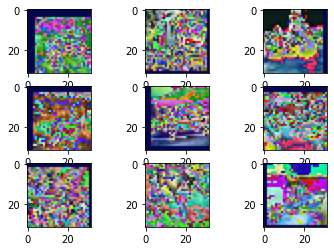

In [56]:
transforms = Compose([
                    #   T.ToPILImage() : 이때는 왜 쓰면 안되는가?
                      RandomCrop((32,32), padding=4),
                      RandomHorizontalFlip(p=0.5),
                      T.ToTensor(), # (3, 32, 32) : Cannel, Height, Width
                      Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)), # 텐서타입에서 연산가능
                      T.ToPILImage() # (3, 32, 32) → (32, 32, 3) : Height, Width, Channel
                      ])

training_data = CIFAR10(root='./', train=True, download=True, transform=transforms) # transform을 적용하지 않으면, CIFAR10원본은 PIL.Image 형식
test_data = CIFAR10(root='./', train=False, download=True, transform=transforms)



for i, (image, target) in enumerate(training_data):
    plt.subplot(3,3,i+1)
    plt.imshow(image) # 
    if i == 8:
        break

 - 리스트와 텐서의 차이

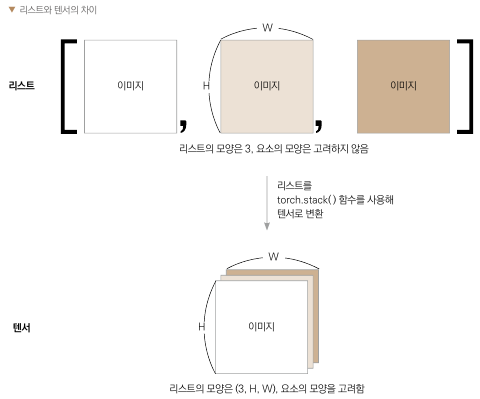

 - 간단한 신경망은 nn.Sequential
 - 복잡한 신경망은 nn.Module
 - 두가지는 사실상 같으나, 관리방법이 조금 다름

 - nn.Sequential
  
  > 층을 쌓기만 하는 간단한 구조에서 편리

  > 데이터 흐름이 한방향(입력층->출력층)인 경우 사용

  > 은닉층에서 순전파 도중의 결과 저장 불가(데이터 흐름을 제어하는 커스터마이징 불가)

 - nn.Module
 
  > 원하는 대로 신경망 동작 정의

In [58]:
# VGG 기본 블록 정의
import torch
import torch.nn as nn

class BasicBlock(nn.Module):

    # 기본 블록 층 정의
    def __init__(self, in_channels, out_channels, hidden_dim):
        super().__init__() # nn.Module 클래스의 속성과 메서드를 모두 불러옴

        self.conv1 = nn.Conv2D(in_channels, hidden_dim, kernel_size=3, padding=1)
        
        self.conv2 = nn.Conv2D(hidden_dim, out_channels, kernel_size=3, padding=1)

        self.relu = nn.ReLU()

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    # 기본 블록 순전파 정의
    def forward(self, x):
        x = self.conv1(x) # 해당 층에 값을 통과시킨다
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

### 전체 CNN 모델 정의하기
 - 입력값 → 합성곱 기본 블록 X 3 → 평탄화 → MLP 층(입력층-은닉층-출력층) → 출력값

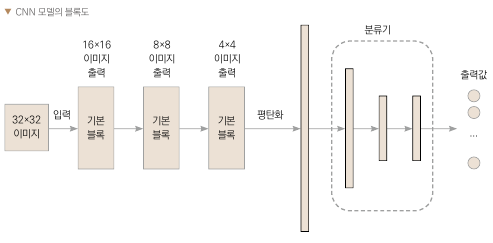

In [ ]:
class CNN(nn.Module):
    def __init__(self, num_classes): # 클래스 개수를 파라미터로 받음
        super().__init__()

        # 합성곱 기본 블록 정의
        self.block1 = BasicBlock(in_channels=3, out_channels=32, hidden_dim=16) # 하나의 VGG 기본 블럭
        # (3,32,32) →conv1 → (16,32,32) → conv2 → (32,32,32) → pool → (32, 16,16)
        self.block2 = BasicBlock()